In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
df = pd.read_csv('CleanData.csv')

In [3]:
df

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
0,1T 7,alcatel,2018-02-01,Available,7.0,600 x 1024,Android 8.1 (Oreo),Mediatek MT8321A (28 nm),microSDXC,8GB,...,2.0,720p,1,0.3,Yes,2580.0,70.0,137.9,170.0,https://www.gsmarena.com/alcatel_1t_7-9094.php
1,Idol 5s,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6757 Helio P20 (16 nm),microSDXC,32GB,...,12.0,1080p,1,8.0,Yes,2850.0,140.0,74.5,424.0,https://www.gsmarena.com/alcatel_idol_5s-8844.php
2,Idol 5,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6753 (28 nm),microSDXC,16GB,...,13.0,1080p,1,5.0,Yes,2800.0,120.0,74.9,423.0,https://www.gsmarena.com/alcatel_idol_5-8832.php
3,A7 XL,alcatel,2017-09-01,Available,6.0,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6750S (28 nm),microSDHC,32GB,...,12.0,1080p,1,5.0,Yes,4000.0,260.0,99.2,367.0,https://www.gsmarena.com/alcatel_a7_xl-8843.php
4,A7,alcatel,2017-09-01,Available,5.5,1080 x 1920,Android 7.0 (Nougat),Mediatek MT6750T (28 nm),microSDXC,32GB,...,16.0,1080p,1,8.0,Yes,4000.0,190.0,83.4,401.0,https://www.gsmarena.com/alcatel_a7-8830.php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,Flash,ZTE,2012-11-01,Discontinued,4.5,720 x 1280,Android 4.0.4 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDXC,8GB,...,6.0,1080p,1,1.0,Yes,1780.0,360.0,55.8,326.0,https://www.gsmarena.com/zte_flash-4893.php
4501,Grand Era U895,ZTE,2012-09-01,Discontinued,4.5,720 x 1280,Android 4.0 (Ice Cream Sandwich),Nvidia Tegra 3,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1800.0,380.0,55.8,326.0,https://www.gsmarena.com/zte_grand_era_u895-50...
4502,Grand X IN,ZTE,2012-08-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Intel XMM 6260,microSDHC,4GB,...,8.0,1080p,1,0.3,Yes,1650.0,430.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_in-4962.php
4503,Grand X LTE T82,ZTE,2012-07-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1900.0,340.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_lte_t82-4...


# EDA

## Biểu đồ nhiệt mức độ tương quan

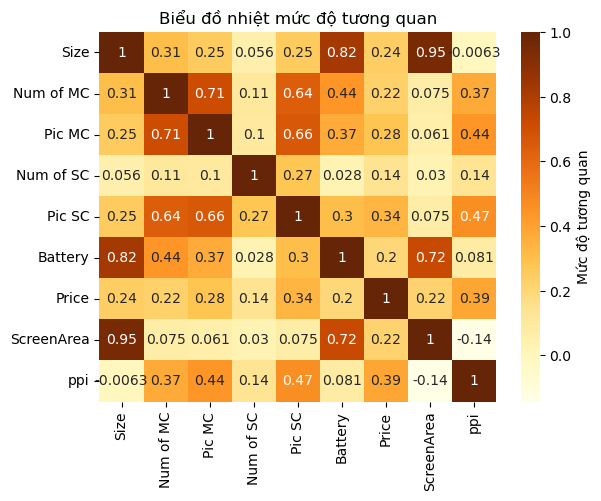

In [4]:
df.corr()
ax = sb.heatmap(df.corr(),annot = True, cmap = 'YlOrBr') # biểu đồ nhiệt thể hiện mức độ tương quan của các thuộc tính ID,SIze, Num of MC ,....
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Mức độ tương quan')
plt.title("Biểu đồ nhiệt mức độ tương quan")
plt.show()

Có thể thấy mức độ tương quan của các thuộc tính có kiểu dữ liệu định lượng có mức độ tương quan rất thấp với nhau

## 3.5mm jack

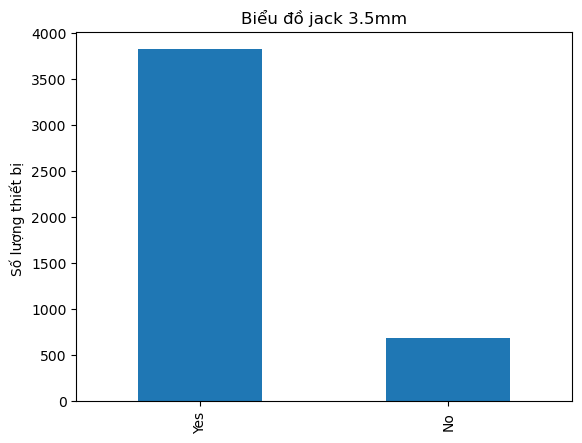

In [5]:
df['3.5mm jack'].value_counts().plot.bar()
plt.title("Biểu đồ jack 3.5mm")
plt.ylabel("Số lượng thiết bị ")
plt.show()

Phần lớn các thiết bị đều có jack cắm 3.5mm nhưng vẫn có một phần khá lớn không có. 

In [6]:
for i in range(len(df['3.5mm jack'])):
    if df['3.5mm jack'][i] == 'No':
        print(df.iloc[[i], 1:3 ], end= '\n==========\n')

     Brand   Announced
104  Apple  2022-10-01
     Brand   Announced
105  Apple  2022-10-01
     Brand   Announced
106  Apple  2022-09-01
     Brand   Announced
107  Apple  2022-09-01
     Brand   Announced
108  Apple  2022-09-01
     Brand   Announced
109  Apple  2022-09-01
     Brand   Announced
110  Apple  2022-03-01
     Brand   Announced
111  Apple  2021-09-01
     Brand   Announced
112  Apple  2021-09-01
     Brand   Announced
113  Apple  2021-09-01
     Brand   Announced
114  Apple  2021-09-01
     Brand   Announced
115  Apple  2021-04-01
     Brand   Announced
116  Apple  2021-04-01
     Brand   Announced
117  Apple  2020-10-01
     Brand   Announced
118  Apple  2020-10-01
     Brand   Announced
119  Apple  2020-10-01
     Brand   Announced
120  Apple  2020-10-01
     Brand   Announced
121  Apple  2020-09-01
     Brand   Announced
122  Apple  2020-04-01
     Brand   Announced
123  Apple  2020-03-01
     Brand   Announced
124  Apple  2020-03-01
     Brand   Announced
125  Apple 

     Brand   Announced
1448  Oppo  2021-09-01
     Brand   Announced
1453  Oppo  2021-05-01
     Brand   Announced
1454  Oppo  2021-05-01
     Brand   Announced
1455  Oppo  2021-05-01
     Brand   Announced
1465  Oppo  2021-03-01
     Brand   Announced
1466  Oppo  2021-03-01
     Brand   Announced
1467  Oppo  2021-03-01
     Brand   Announced
1480  Oppo  2020-12-01
     Brand   Announced
1482  Oppo  2020-12-01
     Brand   Announced
1502  Oppo  2020-06-01
     Brand   Announced
1503  Oppo  2020-06-01
     Brand   Announced
1505  Oppo  2020-04-01
     Brand   Announced
1513  Oppo  2020-04-01
     Brand   Announced
1516  Oppo  2020-03-01
     Brand   Announced
1517  Oppo  2020-03-01
     Brand   Announced
1521  Oppo  2019-12-01
     Brand   Announced
1539  Oppo  2019-04-01
     Brand   Announced
1540  Oppo  2019-04-01
     Brand   Announced
1551  Oppo  2018-08-01
     Brand   Announced
1556  Oppo  2018-06-01
     Brand   Announced
1557  Oppo  2018-06-01
     Brand   Announced
1592  Oppo 

        Brand   Announced
2379  Samsung  2022-02-01
        Brand   Announced
2380  Samsung  2022-02-01
        Brand   Announced
2381  Samsung  2022-02-01
        Brand   Announced
2382  Samsung  2022-02-01
        Brand   Announced
2383  Samsung  2022-01-01
        Brand   Announced
2389  Samsung  2021-09-01
        Brand   Announced
2394  Samsung  2021-08-01
        Brand   Announced
2395  Samsung  2021-08-01
        Brand   Announced
2404  Samsung  2021-05-01
        Brand   Announced
2408  Samsung  2021-04-01
        Brand   Announced
2418  Samsung  2021-01-01
        Brand   Announced
2419  Samsung  2021-01-01
        Brand   Announced
2420  Samsung  2021-01-01
        Brand   Announced
2431  Samsung  2020-09-01
        Brand   Announced
2432  Samsung  2020-09-01
        Brand   Announced
2437  Samsung  2020-08-01
        Brand   Announced
2438  Samsung  2020-08-01
        Brand   Announced
2439  Samsung  2020-08-01
        Brand   Announced
2440  Samsung  2020-08-01
        Bran

     Brand   Announced
3698  vivo  2021-10-01
     Brand   Announced
3701  vivo  2021-09-01
     Brand   Announced
3702  vivo  2021-09-01
     Brand   Announced
3703  vivo  2021-09-01
     Brand   Announced
3706  vivo  2021-08-01
     Brand   Announced
3708  vivo  2021-08-01
     Brand   Announced
3710  vivo  2021-07-01
     Brand   Announced
3711  vivo  2021-07-01
     Brand   Announced
3715  vivo  2021-06-01
     Brand   Announced
3719  vivo  2021-05-01
     Brand   Announced
3724  vivo  2021-04-01
     Brand   Announced
3725  vivo  2021-04-01
     Brand   Announced
3727  vivo  2021-04-01
     Brand   Announced
3729  vivo  2021-04-01
     Brand   Announced
3731  vivo  2021-03-01
     Brand   Announced
3732  vivo  2021-03-01
     Brand   Announced
3736  vivo  2021-03-01
     Brand   Announced
3737  vivo  2021-03-01
     Brand   Announced
3738  vivo  2021-03-01
     Brand   Announced
3739  vivo  2021-02-01
     Brand   Announced
3740  vivo  2021-01-01
     Brand   Announced
3744  vivo 

In [7]:
df[(df['3.5mm jack'] == 'No') & (df.Brand == 'Apple')]

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
104,iPad Pro 12.9 (2022),Apple,2022-10-01,Available,12.9,2048 x 2732,iPadOS 16.1,Apple M2,No,128GB,...,12.0,4K,1,12.0,No,10758.0,1450.000000,515.3,265.0,https://www.gsmarena.com/apple_ipad_pro_12_9_(...
105,iPad Pro 11 (2022),Apple,2022-10-01,Available,11.0,1668 x 2388,iPadOS 16.1,Apple M2,No,128GB,...,12.0,4K,1,12.0,No,7538.0,1050.000000,366.5,265.0,https://www.gsmarena.com/apple_ipad_pro_11_(20...
106,iPhone 14 Pro Max,Apple,2022-09-01,Available,6.7,1290 x 2796,iOS 16,Apple A16 Bionic (4 nm),No,128GB,...,48.0,4K,1,12.0,No,4323.0,885.849057,110.2,460.0,https://www.gsmarena.com/apple_iphone_14_pro_m...
107,iPhone 14 Pro,Apple,2022-09-01,Available,6.1,1179 x 2556,iOS 16,Apple A16 Bionic (4 nm),No,128GB,...,48.0,4K,1,12.0,No,3200.0,942.452830,91.7,460.0,https://www.gsmarena.com/apple_iphone_14_pro-1...
108,iPhone 14 Plus,Apple,2022-09-01,Available,6.7,1284 x 2778,iOS 16,Apple A15 Bionic (5 nm),No,128GB,...,12.0,4K,1,12.0,No,4323.0,678.301887,109.8,458.0,https://www.gsmarena.com/apple_iphone_14_plus-...
109,iPhone 14,Apple,2022-09-01,Available,6.1,1170 x 2532,iOS 16,Apple A15 Bionic (5 nm),No,128GB,...,12.0,4K,1,12.0,No,3279.0,725.471698,90.2,460.0,https://www.gsmarena.com/apple_iphone_14-11861...
110,iPhone SE (2022),Apple,2022-03-01,Available,4.7,750 x 1334,iOS 15.4,Apple A15 Bionic (5 nm),No,64GB,...,12.0,4K,1,7.0,No,2018.0,186.792453,60.9,326.0,https://www.gsmarena.com/apple_iphone_se_(2022...
111,iPhone 13 Pro Max,Apple,2021-09-01,Available,6.7,1284 x 2778,iOS 15,Apple A15 Bionic (5 nm),No,128GB,...,12.0,4K,1,12.0,No,4352.0,904.716981,109.8,458.0,https://www.gsmarena.com/apple_iphone_13_pro_m...
112,iPhone 13 Pro,Apple,2021-09-01,Available,6.1,1170 x 2532,iOS 15,Apple A15 Bionic (5 nm),No,128GB,...,12.0,4K,1,12.0,No,3095.0,841.509434,90.2,460.0,https://www.gsmarena.com/apple_iphone_13_pro-1...
113,iPhone 13,Apple,2021-09-01,Available,6.1,1170 x 2532,iOS 15,Apple A15 Bionic (5 nm),No,128GB,...,12.0,4K,1,12.0,No,3240.0,687.735849,90.2,460.0,https://www.gsmarena.com/apple_iphone_13-11103...


Các thiết bị của hãng apple nhưng không có jack cắm 3.5mm

In [8]:
df[(df.Brand == 'Apple') & (df['3.5mm jack'] == 'Yes')]

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
128,iPad 10.2 (2019),Apple,2019-09-01,Available,10.2,1620 x 2160,iPadOS 13.1,Apple A10 Fusion (16 nm),No,32GB,...,8.0,1080p,1,2.0,Yes,8827.0,350.0,324.6,264.0,https://www.gsmarena.com/apple_ipad_10_2_(2019...
129,iPad Air (2019),Apple,2019-03-01,Available,10.5,1668 x 2224,iOS 12.1.3,Apple A12 Bionic (7 nm),No,64GB,...,8.0,1080p,1,7.0,Yes,8134.0,550.0,341.4,265.0,https://www.gsmarena.com/apple_ipad_air_(2019)...
130,iPad mini (2019),Apple,2019-03-01,Available,7.9,1536 x 2048,iOS 12.1.3,Apple A12 Bionic (7 nm),No,64GB,...,8.0,1080p,1,7.0,Yes,5124.0,450.0,193.3,324.0,https://www.gsmarena.com/apple_ipad_mini_(2019...
136,iPad 9.7 (2018),Apple,2018-03-01,Available,9.7,1536 x 2048,iOS 11.3,Apple A10 Fusion (16 nm),No,32GB,...,8.0,1080p,1,2.0,Yes,8827.0,350.0,291.4,264.0,https://www.gsmarena.com/apple_ipad_9_7_(2018)...
140,iPad Pro 10.5 (2017),Apple,2017-06-01,Available,10.5,1668 x 2224,iOS 10.3.2,Apple A10X Fusion (10 nm),No,64GB,...,12.0,4K,1,7.0,Yes,8134.0,730.0,341.4,265.0,https://www.gsmarena.com/apple_ipad_pro_10_5_(...
141,iPad 9.7 (2017),Apple,2017-03-01,Available,9.7,1536 x 2048,iOS 10.3,Apple A9 (14 nm),No,32GB,...,8.0,1080p,1,2.0,Yes,8827.0,390.0,291.4,264.0,https://www.gsmarena.com/apple_ipad_9_7_(2017)...
144,iPad Pro 9.7 (2016),Apple,2016-03-01,Discontinued,9.7,1536 x 2048,iOS 9.3.2,Apple A9X (16 nm),No,32GB,...,12.0,4K,1,5.0,Yes,7306.0,690.0,291.4,264.0,https://www.gsmarena.com/apple_ipad_pro_9_7_(2...
145,iPhone SE,Apple,2016-03-01,Discontinued,4.0,640 x 1136,iOS 9.3.2,Apple A9 (14 nm),No,16GB,...,12.0,4K,1,2.0,Yes,1624.0,140.0,44.1,326.0,https://www.gsmarena.com/apple_iphone_se-7969.php
146,iPhone 6s Plus,Apple,2015-09-01,Discontinued,5.5,1080 x 1920,iOS 9,Apple A9 (14 nm),No,16GB,...,12.0,4K,1,5.0,Yes,2750.0,240.0,83.4,401.0,https://www.gsmarena.com/apple_iphone_6s_plus-...
147,iPhone 6s,Apple,2015-09-01,Discontinued,4.7,750 x 1334,iOS 9,Apple A9 (14 nm),No,16GB,...,12.0,4K,1,5.0,Yes,1715.0,230.0,60.9,326.0,https://www.gsmarena.com/apple_iphone_6s-7242.php


Các thiết bị của hãng apple nhưng có jack cắm 3.5mm 

Ta thấy tất từ khi Apple cho ra mắt iphone 7 thì đã mất jack 3.5mm trên điện thoại và từ đó đến nay thì apple vẫn giữ nguyên sự thay đổi này họ không thay đổi thiết kế của mình và vẫn bỏ jack 3.5mm trên thiết bị điện thoại của mình. Còn đối với ipad thì 2018 họ đã bỏ jack 3.5mm nhưng đến năm 2019 họ lại thêm vào nhưng từ năm 2020 các dòng ipad đều ko có jack 3.5mm 

In [9]:
df[(df['3.5mm jack'] == 'No') & (df.Brand == 'Samsung')]

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
1861,Galaxy S23 Ultra,Samsung,2023-02-01,Available,6.8,1440 x 3088,Android 13,Qualcomm SM8550-AC Snapdragon 8 Gen 2 (4 nm),No,128GB,...,200.0,8K,1,12.0,No,5000.0,1033.018868,114.7,500.0,https://www.gsmarena.com/samsung_galaxy_s23_ul...
1862,Galaxy S23+,Samsung,2023-02-01,Available,6.6,1080 x 2340,Android 13,Qualcomm SM8550-AC Snapdragon 8 Gen 2 (4 nm),No,256GB,...,50.0,8K,1,12.0,No,4700.0,810.377358,105.3,393.0,https://www.gsmarena.com/samsung_galaxy_s23+-1...
1863,Galaxy S23,Samsung,2023-02-01,Available,6.1,1080 x 2340,Android 13,Qualcomm SM8550-AC Snapdragon 8 Gen 2 (4 nm),No,128GB,...,50.0,8K,1,12.0,No,3900.0,733.962264,90.1,425.0,https://www.gsmarena.com/samsung_galaxy_s23-12...
1871,Galaxy Z Fold4,Samsung,2022-08-01,Available,7.6,1812 x 2176,Android 12L,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),No,256GB,...,50.0,8K,1,10.0,No,4400.0,896.226415,183.2,373.0,https://www.gsmarena.com/samsung_galaxy_z_fold...
1872,Galaxy Z Flip4,Samsung,2022-08-01,Available,6.7,1080 x 2640,Android 12,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),No,128GB,...,12.0,4K,1,10.0,No,3700.0,607.547170,101.5,426.0,https://www.gsmarena.com/samsung_galaxy_z_flip...
2367,Galaxy M53,Samsung,2022-04-01,Available,6.7,1080 x 2408,Android 12,Mediatek MT6877 Dimensity 900 (6 nm),microSDXC,128GB,...,108.0,4K,1,32.0,No,5000.0,354.000000,108.1,394.0,https://www.gsmarena.com/samsung_galaxy_m53-11...
2368,Galaxy S20 FE 2022,Samsung,2022-04-01,Available,6.5,1080 x 2400,Android 12,Qualcomm SM8250 Snapdragon 865 5G (7 nm+),microSDXC,128GB,...,12.0,4K,1,32.0,No,4500.0,520.000000,102.0,405.0,https://www.gsmarena.com/samsung_galaxy_s20_fe...
2369,Galaxy A73 5G,Samsung,2022-03-01,Available,6.7,1080 x 2400,Android 12,Qualcomm SM7325 Snapdragon 778G 5G (6 nm),microSDXC,128GB,...,108.0,4K,1,32.0,No,5000.0,373.584906,108.4,393.0,https://www.gsmarena.com/samsung_galaxy_a73_5g...
2370,Galaxy A53 5G,Samsung,2022-03-01,Available,6.5,1080 x 2400,Android 12,Exynos 1280 (5 nm),microSDXC,128GB,...,64.0,4K,1,32.0,No,5000.0,295.283019,102.0,405.0,https://www.gsmarena.com/samsung_galaxy_a53_5g...
2371,Galaxy A33 5G,Samsung,2022-03-01,Available,6.4,1080 x 2400,Android 12,Exynos 1280 (5 nm),microSDXC,128GB,...,48.0,4K,1,13.0,No,5000.0,235.849057,98.9,411.0,https://www.gsmarena.com/samsung_galaxy_a33_5g...


Các thiết bị của hãng Samsung không có jack cắm 3.5 mm

In [10]:
df[(df['3.5mm jack'] == 'Yes') & (df.Brand == 'Samsung')].head(5)

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
1864,Galaxy A14 5G,Samsung,2023-01-01,Available,6.6,1080 x 2408,Android 13,Mediatek MT6833 Dimensity 700 (7 nm),microSDXC,64GB,...,50.0,1080p,1,13.0,Yes,5000.0,121.698113,104.9,400.0,https://www.gsmarena.com/samsung_galaxy_a14_5g...
1865,Galaxy F04,Samsung,2023-01-01,Available,6.5,720 x 1600,Android 12,Mediatek MT6765 Helio P35 (12nm),microSDXC,64GB,...,13.0,1080p,1,5.0,Yes,5000.0,90.000000,102.0,270.0,https://www.gsmarena.com/samsung_galaxy_f04-12...
1866,Galaxy M04,Samsung,2022-12-01,Available,6.5,720 x 1600,Android 12,Mediatek MT6765 Helio P35 (12nm),microSDXC,64GB,...,13.0,1080p,1,5.0,Yes,5000.0,107.988000,102.0,270.0,https://www.gsmarena.com/samsung_galaxy_m04-12...
1867,Galaxy Tab A7 10.4 (2022),Samsung,2022-11-01,Available,10.4,1200 x 2000,Android 12,Unisoc UMS512 T618 (12 nm),microSDXC,32GB,...,8.0,1080p,1,5.0,Yes,7040.0,250.000000,307.9,224.0,https://www.gsmarena.com/samsung_galaxy_tab_a7...
1868,Galaxy A04e,Samsung,2022-10-01,Available,6.5,720 x 1600,Android 12,Mediatek MT6765 Helio P35 (12nm),microSDXC,32GB,...,13.0,1080p,1,5.0,Yes,5000.0,101.886792,102.0,270.0,https://www.gsmarena.com/samsung_galaxy_a04e-1...


Các thiết bị của hãng Samsung có jack 3.5mm

Có thể thấy Samsung là hẵng điện thoại có nhiều sản phẩm có cả jack 3.5mm và không có jack3.5mm nhưng nhìn chung các dòng sản phẩm cao cấp của hãng gần đây có vẻ đã bỏ jack 3.5mm. Còn các sản phẩm ở mức giá trung bình hoặc thấp thì hãng vẫn giữ lại jack 3.5mm.

## Price

 chia mức giá của điện thoại làm 3 loại
 - điện thoại có mức giá tthấp : dưới 5m ( dưới 200 euro)
     - Trong phân khúc này, các điện thoại thường có cấu hình và tính năng tương đối cơ bản, chạy hệ điều hành Android phiên bản cũ và hiệu suất xử lý thấp hơn so với các phân khúc khác
 - điện thoại có mức giá trung bình : từ 5m đến 15m ( từ 200 đến 600 euro)
     - Trong phân khúc này, các điện thoại có tính năng và cấu hình tốt hơn, bao gồm màn hình đẹp, camera chất lượng cao hơn, hiệu suất xử lý mạnh mẽ hơn, và hỗ trợ nhiều tính năng tiên tiến hơn.
 - điện thoại có mức giá cao cấp : từ 15m trở lên (trên 600 euro) 
     - Phân khúc cao cấp là dành cho những người dùng có ngân sách dồi dào và yêu cầu cao về tính năng, hiệu suất và thiết kế. Trong phân khúc này, các điện thoại thường có cấu hình và tính năng tốt nhất, bao gồm màn hình AMOLED, camera chụp ảnh chất lượng cao, khả năng chống nước và bụi, hỗ trợ sạc nhanh và sạc không dây, và nhiều tính năng tiên tiến khác. 

In [11]:
lst_price = [0,0,0]
for i in df.Price:
    if i < 250 :
        lst_price[0] += 1 
    elif i < 600:
        lst_price[1] += 1
    else :
        lst_price[2] += 1
lst_price

[2664, 1583, 258]

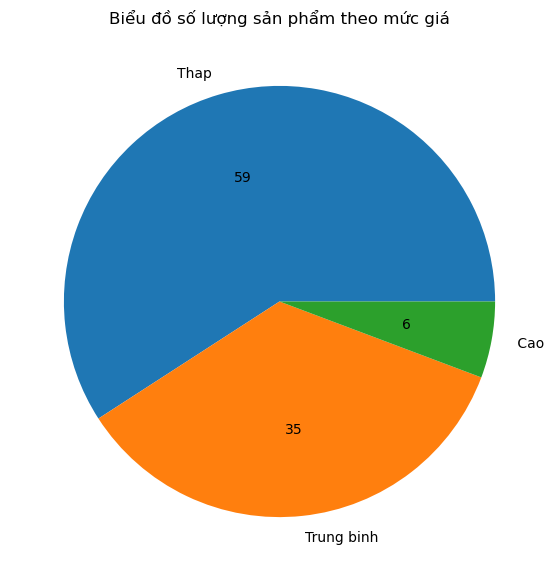

In [12]:
gia = ['Thap', 'Trung binh', ' Cao']
fig = plt.figure(figsize =(10, 7))
plt.pie(lst_price, labels= gia, autopct='%1.0f')
plt.title("Biểu đồ số lượng sản phẩm theo mức giá")
plt.show()

Có thể thấy phần lớn các sản phẩm tập trung vào 2 thị trường chính là các dòng điện thoại có mức giá thấp và trung bình. Dòng điện thoại có mức giá cao chỉ chiếm có 6% số sản phẩm

### Ta sẽ kiểm tra giá điện thoại có mức giá cao nhất khi gia mắt của các năm ?

In [13]:
max_prices_by_year = {}
for date, price in zip(df.Announced ,df.Price):
    year = date.split('-')[0]
    if year not in max_prices_by_year or price > max_prices_by_year[year]:
        max_prices_by_year[year] = price
max_prices_by_year
max_prices_by_year = dict(sorted(max_prices_by_year.items()))
max_prices_by_year

{'2006': 220.0,
 '2007': 150.0,
 '2008': 310.0,
 '2009': 230.0,
 '2010': 280.0,
 '2011': 370.0,
 '2012': 550.0,
 '2013': 1000.0,
 '2014': 8290.0,
 '2015': 500.0,
 '2016': 1150.0,
 '2017': 840.0,
 '2018': 3151.0,
 '2019': 2500.0,
 '2020': 1884.9056603773583,
 '2021': 2300.0,
 '2022': 1880.0,
 '2023': 1100.0}

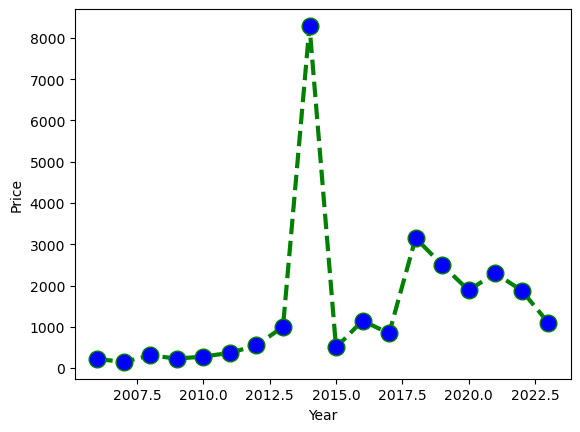

In [14]:
x = list(max_prices_by_year.keys())
x = [float(val) for val in x]  
y = list(max_prices_by_year.values())


plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

Từ khoảng những năm 2005 đến năm 2012 giá của những chiếc điện thoại có vẻ tăng theo chiều hướng tăng dần vì những dòng điện thoại cao cấp, được trang bị, thiết kế những ứng dụng tính năng và tiện ích riêng. Nhưng vào khoảng những năm 2014 lại xuất hiện một thiết bị có giá tận hơn 8000 euro. Liệu có điểm bất thường hay không. Và sau năm 2015 giá điện thoại có vẻ khá thất thường không theo một quy luật đó là càng hiện đại thì lại hại tiền. 

In [15]:
df[df.Price > 8000]

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
3580,Signature Touch,Vertu,2014-06-01,Discontinued,4.7,1080 x 1920,Android 4.4.2 (KitKat),Qualcomm Snapdragon 801 (28 nm),No,64GB,...,13.0,1080p,1,1.0,Yes,2275.0,8290.0,60.9,469.0,https://www.gsmarena.com/vertu_signature_touch...


Chiếc điện thoại có giá trị cao nhất trong toàn bộ tập dữ liệu thuộc về Signature Touch của hãng Vertu. Dưới đây là một vài thông tin về chiếc điện thoại này để chứng minh tại sao nó lại đắt như vậy ' Điện thoại này có màn hình cảm ứng 4.7 inch, độ phân giải 1080 x 1920 pixel. Nó chạy trên hệ điều hành Android 4.4 KitKat và được trang bị chip Qualcomm Snapdragon 801, RAM 2GB và bộ nhớ trong 64GB. Điện thoại này có camera chính 13MP và camera phụ 2.1MP, hỗ trợ kết nối 4G LTE, Wi-Fi, Bluetooth và GPS. Ngoài ra, nó còn được trang bị hệ thống loa kép và kỹ thuật âm thanh Dolby Digital Plus, cho phép người dùng tận hưởng chất lượng âm thanh cao cấp. Các chi tiết của Signature Touch được làm bằng các vật liệu cao cấp như da cá sấu, titan và sapphire'.
  
Thông tin được tóm tắt từ (https://executive-bulletin.com/retail/vertu-launches-signature-touch-the-handmade-high-performance-smartphone)

### Kiểm tra giá điện thoại trung bình qua từng năm 

In [16]:
from collections import defaultdict
data_by_year = defaultdict(list)

for date, price in zip(df.Announced, df.Price):
    year = date.split("-")[0]
    data_by_year[year].append(price)

avg_prices_by_year = {}
for year, prices in data_by_year.items():
    avg_prices_by_year[year] = sum(prices) / len(prices)

avg_prices_by_year = dict(sorted(avg_prices_by_year.items()))
avg_prices_by_year

{'2006': 220.0,
 '2007': 150.0,
 '2008': 246.0,
 '2009': 148.0,
 '2010': 160.0,
 '2011': 188.1679389312977,
 '2012': 237.0879120879121,
 '2013': 231.36929460580913,
 '2014': 252.0911528150134,
 '2015': 210.27777777777777,
 '2016': 229.41815476190476,
 '2017': 224.2774052478134,
 '2018': 270.4010668217917,
 '2019': 297.6318782472692,
 '2020': 294.77461374712806,
 '2021': 288.67300885972105,
 '2022': 331.13535426742055,
 '2023': 325.263375508694}

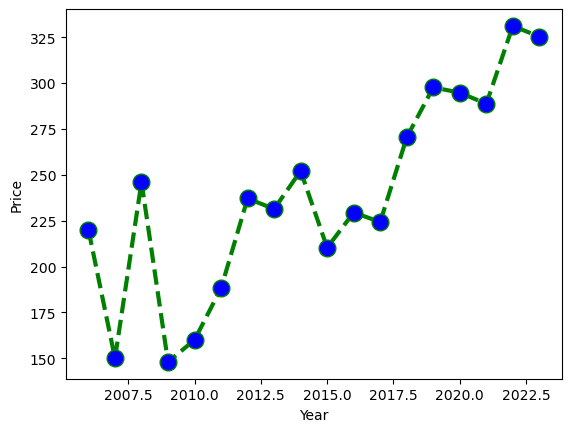

In [17]:
x = list(avg_prices_by_year.keys())
x = [float(val) for val in x]  
y = list(avg_prices_by_year.values())


plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

Có thể thấy giá điện thoại trung bình qua từng năm thay đổi khá thất thường. Có thể do khi lúc điện thoại phát triển thì mức độ tập trung cho các phân khúc thị trường là khác nhau qua từng giai đoạn. Từ năm 2005 - 2010 là thời điểm nokia thống trị sản xuất điện thoại trên toàn thế giới từng chiếm 40% thị trường và họ tập trung phân khúc của mình vào giá rẻ và trung bình. Nhưng đến khi Samsung và Iphone bắt đầu thống trị sản xuất điện thoại thì mức độ tập trung của họ vào các phân khúc cao và trung bình nhiều hơn điều này có thể khiến giá điện thoại trung bình qua nhiều năm bắt đầy tăng từ năm 2010 khi mà nokia không còn dẫn đầu nữa. 

### Kiểm tra gía điện thoại trung bình của những hãng điện thoại lớn có thị trường tại Việt nam

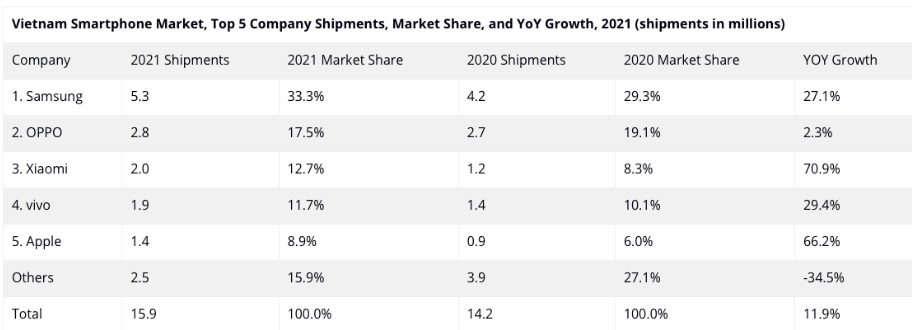

In [35]:
Brand_phone = ['Oppo','Apple','Samsung','Xiaomi','vivo']

avg_prices_by_brand = defaultdict(list)
for brand, price in zip(Brand_phone, df.Price):
    avg_prices_by_brand[brand].append(price)
for brand, prices in avg_prices_by_brand.items():
    avg_price = sum(prices) / len(prices)
    avg_prices_by_brand[brand] = avg_price
avg_prices_by_brand

defaultdict(list,
            {'Oppo': 70.0,
             'Apple': 140.0,
             'Samsung': 120.0,
             'Xiaomi': 260.0,
             'vivo': 190.0})

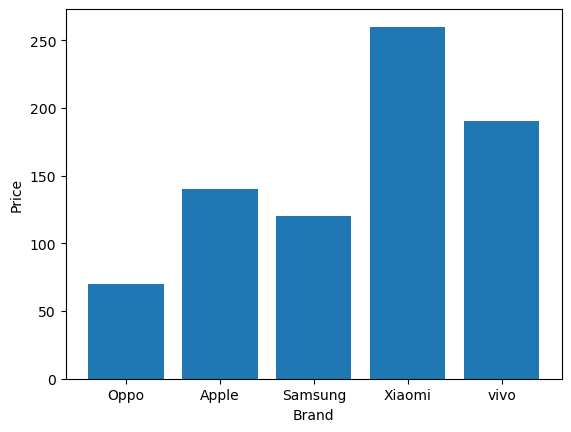

In [19]:
x = list(avg_prices_by_brand.keys())
y = list(avg_prices_by_brand.values())


plt.bar(x,y)
plt.xlabel('Brand')
plt.ylabel('Price')

plt.show()

Xiaomi là hãng điện thoại có mức giá trung bình cao nhất trong 5 hãng điện thoại lớn tại việt nam. hãng này có nhiều hãng điện thoại con và tập trung vô nhiều phân khúc giá khác nhau nhưng đa số hãng tập trung vào giá rẻ và tầm trung. Ngoài ra việc mà Xiaomi có mức giá trung bình cao vì bắt đầu bước chân vào thị trường khá muộn năm 2011 vì thế mà giá bán điện thoại không bị thấp như các hãng khác khi họ bắt đầu vào thị trường khá sớm. 

## Status

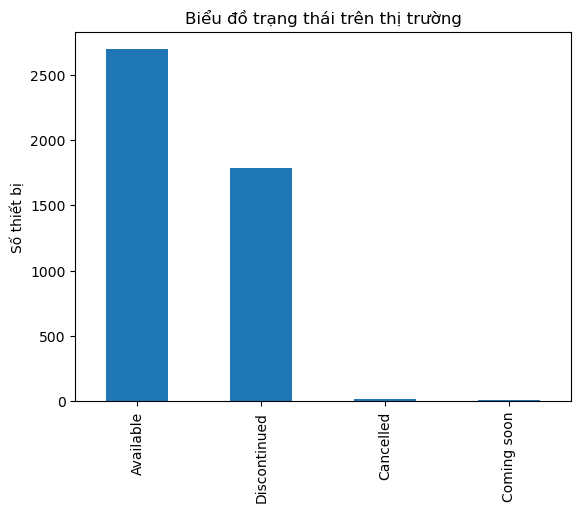

In [20]:
df.Status.value_counts().plot.bar()
plt.title('Biểu đồ trạng thái trên thị trường')
plt.ylabel('Số thiết bị')
plt.show()

Đa số các sản phâm đều có sẵn hoặc các hãng đã dừng sản xuất do những thiết bị cũ đã không còn đáp ứng được nhu cầu của thị trường. Cũng như đây là một cách để giảm tính cạnh tranh khi việc hãng cho ra sản phẩm mới nhưng lại bị chính những các sản phẩm cũ của thương hiệu mình cạnh tranh( có thể lấy ví dụ như apple)'

Ngoài ra, thì còn có các sản phẩm đã bị ngừng việc phát hành hoặc hãng đã công bố thời gian ra mắt chính thức nhưng chưa có sẵn để bán. Ví dụ như Redmi 11 đã phải tạm ngừng việc ra mắt vào ngày 2021-08-01. Nguyên nhân được cho Xiaomi hiện chỉ tích trữ được một lượng nhỏ chip Dimensity trong kho nhà máy công ty, vì vậy Xiaomi đã quyết định sử dụng chip Snapdragon thay thế và trì hoãn việc ra mắt.

In [21]:
df[df.Status == 'Cancelled']

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
169,Diamond,Archos,2019-02-01,Cancelled,6.39,1080 x 2340,Android 9.0 (Pie),Mediatek MT6771 Helio P70 (12nm),microSDXC,128GB,...,16.0,1080p,1,8.0,Yes,3400.0,300.0,100.2,403.0,https://www.gsmarena.com/archos_diamond-9593.php
418,W11,LG,2020-11-01,Cancelled,6.52,720 x 1600,Android 10,Mediatek MT6762 Helio P22 (12 nm),microSDXC,32GB,...,13.0,1080p,1,8.0,Yes,4000.0,110.0,102.6,269.0,https://www.gsmarena.com/lg_w11-10587.php
1013,DROID BIONIC XT865,Motorola,2011-01-01,Cancelled,4.30,540 x 960,Android 2.2.1 (Gingerbread),Nvidia Tegra 2 AP20H,microSDHC,16GB,...,8.0,720p,1,0.3,Yes,1930.0,250.0,51.0,256.0,https://www.gsmarena.com/motorola_droid_bionic...
1019,Zenfone Pegasus 3s,Asus,2017-01-01,Cancelled,5.20,720 x 1280,Android 7.0 (Nougat),Mediatek MT6750 (28 nm),microSDXC,32GB,...,13.0,1080p,1,8.0,Yes,5000.0,330.0,74.5,282.0,https://www.gsmarena.com/asus_zenfone_pegasus_...
1333,G,Nokia,2021-04-01,Cancelled,6.38,720 x 1560,Android 11,Qualcomm SM4250 Snapdragon 460 (11 nm),microSDXC,32GB,...,48.0,1080p,1,16.0,Yes,4000.0,140.0,99.9,269.0,https://www.gsmarena.com/nokia_g-10792.php
1766,V11s 5G,Realme,2021-09-01,Cancelled,6.50,720 x 1600,Android 11,Mediatek MT6833P Dimensity 810 (6 nm),microSDXC,128GB,...,13.0,1080p,1,8.0,Yes,5000.0,190.0,102.0,270.0,https://www.gsmarena.com/realme_v11s_5g-11122.php
1885,Legacy 5G,Coolpad,2020-01-01,Cancelled,6.53,1080 x 2340,Android 10,Qualcomm SM7250 Snapdragon 765G 5G (7 nm),microSD,64GB,...,48.0,4K,1,16.0,Yes,4000.0,360.0,104.7,395.0,https://www.gsmarena.com/coolpad_legacy_5g-100...
1955,Power Max P8100S,Energizer,2019-02-01,Cancelled,8.10,1536 x 2048,Android 9.0 (Pie),Qualcomm SM8150 Snapdragon 855 (7 nm),microSDXC,256GB,...,48.0,4K,1,24.0,No,10000.0,900.0,203.2,316.0,https://www.gsmarena.com/energizer_power_max_p...
2815,Galaxy A72 5G,Samsung,2021-03-01,Cancelled,6.70,1080 x 2400,Android 12,Qualcomm SM7225 Snapdragon 750G 5G (8 nm),microSDXC,128GB,...,64.0,4K,1,32.0,Yes,5000.0,550.0,108.4,393.0,https://www.gsmarena.com/samsung_galaxy_a72_5g...
3296,Tablet,Jolla,2014-11-01,Cancelled,7.85,1536 x 2048,Sailfish 2.0,Intel Atom Z3735F,microSD,32GB,...,5.0,1080p,1,2.0,Yes,4450.0,170.0,186.2,330.0,https://www.gsmarena.com/jolla_tablet-6816.php


## Chip set

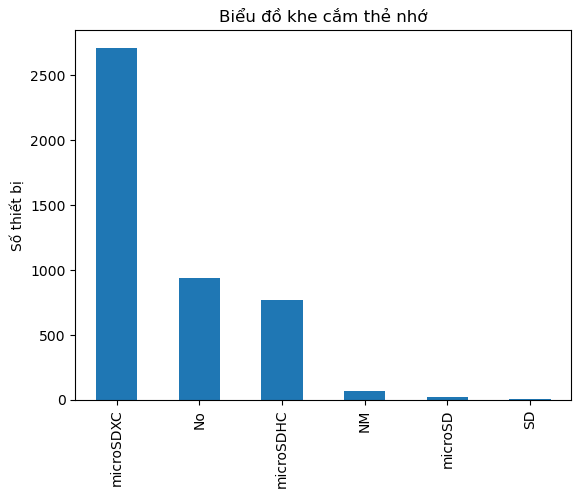

In [22]:
df['Card slot'].value_counts().plot.bar()
plt.title("Biểu đồ khe cắm thẻ nhớ")
plt.ylabel("Số thiết bị")
plt.show()

Phần lớn các thiết bị đều có khe cắm thẻ nhớ microSDXC và microSDHC chỉ có một vài thiết bị khác có khe cắm thẻ nhớ MM, microSD, SD RS-DV-MMC

### Num of MC

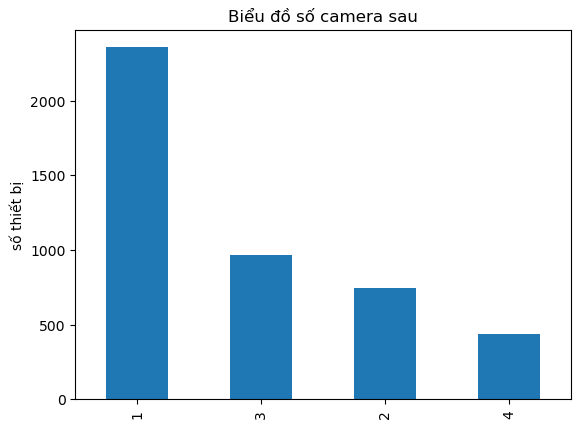

In [39]:
df['Num of MC'].value_counts().plot.bar()
plt.title("Biểu đồ số camera sau")
plt.ylabel("số thiết bị")
plt.show()

In [23]:
a = []
date_before = datetime.date(1000,1, 1)
min_2 = date_before
min_3 = date_before
min_4 = date_before
for i in range(len(df['Num of MC'])):
    min_2 = df['Announced'][0]
    min_3 = df['Announced'][0]
    min_4 = df['Announced'][0]
    if df['Num of MC'][i] == 2: 
        if min_2 > df['Announced'][i]:
            min_2 = df['Announced'][i]
    if df['Num of MC'][i] == 3: 
        if min_3 > df['Announced'][i]:
            min_3 = df['Announced'][i]
    if df['Num of MC'][i] == 4: 
        if min_4 > df['Announced'][i]:
            min_4 = df['Announced'][i]
print(min_2)
print(min_3)
print(min_4)

2018-02-01
2018-02-01
2018-02-01


- Vào tháng 2 năm 2018 là thời điểm đầu sớm mà trên sàn thương mại điện tử này xuất hiện chiếc điện thoại được coi là công bố sớm nhất có 2 camera và cũng thời điểm đó là thời điểm mà các chiếc điện thoại có 3 và 4 camera có trên wed. 

In [24]:
count_num_of_MC = 0
for i in range(len(df['Num of MC'])):
    if (df['Announced'][i] > '2018-02-01') & (df['Num of MC'][i] < 2 ):
        count_num_of_MC += 1 
count_num_of_MC

382

Số điện thoại có 1 chiếc camera được đăng lên sàn thương mai điện thử tính đến sau ngày 1 - 2 - 2018

In [25]:
len(df[(df['Announced'] > '2018-02-01') & (df['Num of MC'] == 1) & (df.Price < 250)])

289

Ta có thể thấy những chiếc điện thoại có 1 camera sau này đa số thuộc những dòng điện thoại có mức giá thấp. Phù hợp với những người có thu nhập thấp

## Num of SC

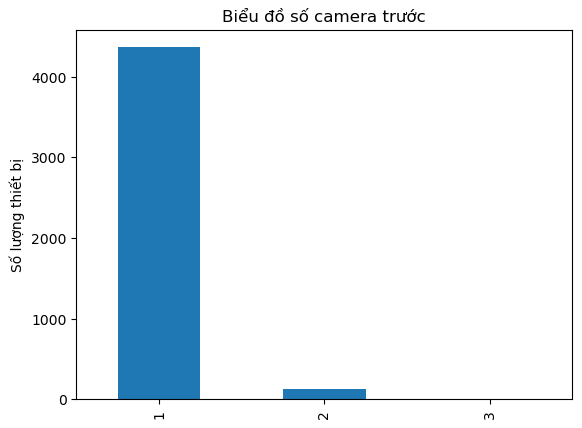

In [26]:
df['Num of SC'].value_counts().plot.bar()
plt.title("Biểu đồ số camera trước")
plt.ylabel("Số lượng thiết bị")
plt.show()

Gần như tất cả các thiết bị đều chỉ có 1 camera phía trước. Điều này tạo điều kiện cho việc sử dụng màn hình tránh vướng

In [27]:
df[(df['Num of SC'] != 1)]

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
202,Zenfone 8 Flip,Asus,2021-05-01,Available,6.67,1080 x 2400,Android 11,Qualcomm SM8350 Snapdragon 888 5G (5 nm),microSDXC,128GB,...,64.0,8K,3,64.0,No,5000.0,490.566038,107.4,395.0,https://www.gsmarena.com/asus_zenfone_8_flip-1...
207,Zenfone 7 Pro,Asus,2020-08-01,Available,6.67,1080 x 2400,Android 10,Qualcomm SM8250 Snapdragon 865 5G+ (7 nm+),microSDXC,256GB,...,64.0,8K,3,64.0,No,5000.0,670.000000,107.4,395.0,https://www.gsmarena.com/asus_zenfone_7_pro-10...
208,Zenfone 7,Asus,2020-08-01,Available,6.67,1080 x 2400,Android 10,Qualcomm SM8250 Snapdragon 865 5G (7 nm+),microSDXC,128GB,...,64.0,8K,3,64.0,No,5000.0,910.000000,107.4,395.0,https://www.gsmarena.com/asus_zenfone_7-10379.php
212,Zenfone 6 ZS630KL,Asus,2019-05-01,Available,6.40,1080 x 2340,Android 9.0 (Pie),Qualcomm SM8150 Snapdragon 855 (7 nm),microSDXC,64GB,...,48.0,4K,2,48.0,Yes,5000.0,500.000000,100.5,403.0,https://www.gsmarena.com/asus_zenfone_6_zs630k...
223,Zenfone 5 Lite ZC600KL,Asus,2018-02-01,Available,6.00,1080 x 2160,Android 7.1.1 (Nougat),Qualcomm SDM630 Snapdragon 630 (14 nm),microSDXC,32GB,...,16.0,4K,2,20.0,Yes,3300.0,200.000000,92.9,402.0,https://www.gsmarena.com/asus_zenfone_5_lite_z...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,Redmi Note 6 Pro,Xiaomi,2018-09-01,Available,6.26,1080 x 2280,Android 8.1 (Oreo),Qualcomm SDM636 Snapdragon 636 (14 nm),microSDXC,32GB,...,12.0,1080p,2,20.0,Yes,4000.0,200.000000,97.8,403.0,https://www.gsmarena.com/xiaomi_redmi_note_6_p...
4390,nubia Z20,ZTE,2019-08-01,Available,6.42,1080 x 2340,Android 9.0 (Pie),Qualcomm SM8150 Snapdragon 855+ (7 nm),No,128GB,...,48.0,8K,3,48.0,No,4000.0,550.000000,101.2,401.0,https://www.gsmarena.com/zte_nubia_z20-9780.php
4399,nubia X,ZTE,2018-10-01,Available,6.26,1080 x 2280,Android 8.1 (Oreo),Qualcomm SDM845 Snapdragon 845 (10 nm),No,64GB,...,24.0,4K,2,24.0,No,3800.0,450.000000,97.8,403.0,https://www.gsmarena.com/zte_nubia_x-9347.php
4411,Blade A3,ZTE,2017-11-01,Available,5.50,720 x 1280,Android 7.1 (Nougat),Mediatek MT6737T (28 nm),microSDXC,32GB,...,13.0,1080p,2,5.0,Yes,4000.0,150.000000,83.4,267.0,https://www.gsmarena.com/zte_blade_a3-9038.php


Chí có 143 chiếc điện thoải là có 2 hoặc 3 camera trước. Rất ít so với số thiết bị trên sàn

## Ram

In [28]:
df_ram = df.RAM.value_counts()
ram_dict = {}

for ram, count in df_ram.items():
    if 'GB' in ram:
        gb = float(ram.replace('GB', '').strip())
        mb = int(gb * 1024)
        ram_dict[f"{mb}MB"] = count
    else:
        ram_dict[ram] = count


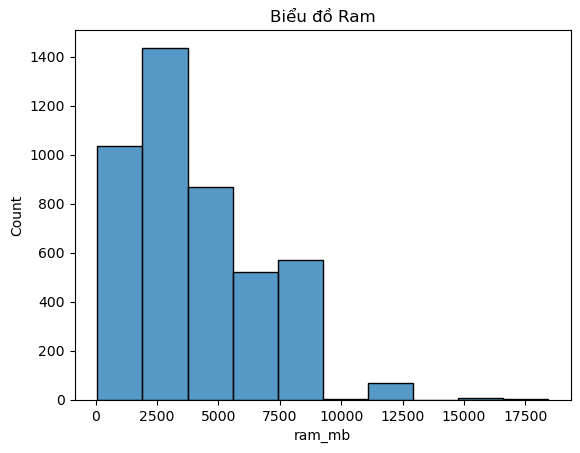

In [29]:
ram_df = pd.DataFrame.from_dict(ram_dict, orient='index', columns=['count'])
ram_df.index.name = 'ram'
ram_df.reset_index(inplace=True)
ram_df['ram_mb'] = ram_df['ram'].apply(lambda x: int(x.replace('MB', '')))

sb.histplot(data=ram_df, x='ram_mb', weights='count', bins=10)
plt.title("Biểu đồ Ram")
plt.show()

Ta thấy tập dữ liệu bị lệch phải. Các thiết bị gần đầy vì nhu cầu chơi game và thực hiện đa nhiệm các ứng dụng nên ram ngày càng được chú trọng và nâng cấp

## Rom 

In [30]:
df_rom = df.ROM.value_counts()
rom_dict = {}

for rom, count in df_rom.items():
    if 'MB' in rom:
        mb = float(rom.replace('MB', '').strip())
        gb = mb / 1024
        rom_dict[f"{gb:.2f}GB"] = count
    else:
        rom_dict[rom] = count

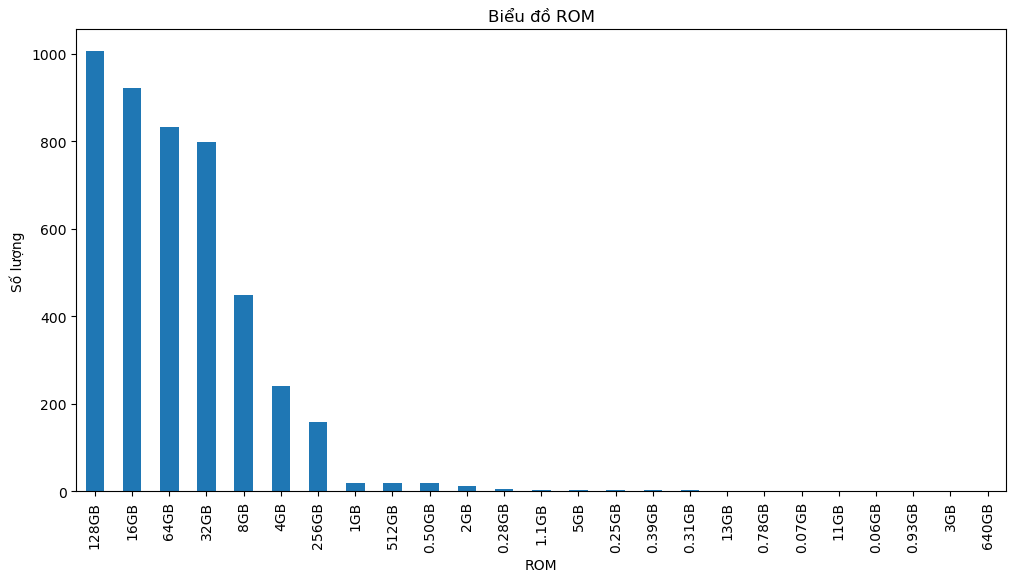

In [31]:
rom_series = pd.Series(rom_dict)

rom_series.plot(kind='bar', figsize=(12, 6)) 

plt.title("Biểu đồ ROM")
plt.xlabel('ROM')
plt.ylabel('Số lượng')
plt.show()

Đa số các thiết bị đều có số Gb bộ nhớ trong tập trung ở 16 đến 128 Gb